![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento.




1.Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte, utilizando los datos que se han puesto a su disposición.

Carguen la base de datos preparada desde la fase 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv("ML_cars_José.csv")

Vamos a clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte

In [2]:
mediana = np.median(data['Precio'])

# Dividir la variable en dos grupos usando la mediana
data['GamaBarata'] = np.where(data['Precio'] <= mediana, 'Barato', 'Caro')

In [3]:
#Cambiar varios valores específicos utilizando el método replace()

data['GamaBarata'] = data['GamaBarata'].replace({"Barato": 1, "Caro": 0})

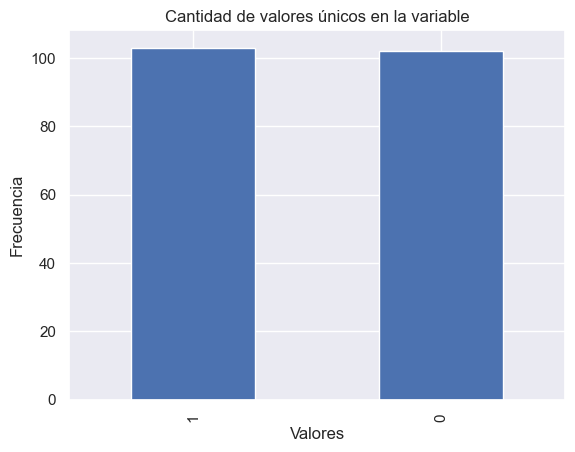

In [4]:
# Contar la cantidad de valores únicos en la variable categórica
conteo_valores = data['GamaBarata'].value_counts()

# Crear un gráfico de barras
conteo_valores.plot(kind='bar')

# Configurar etiquetas y título del gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Cantidad de valores únicos en la variable')

# Mostrar el gráfico
plt.show()

Separen el dataset en X, y (variable objetivo)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Longitud                          205 non-null    float64
 1   Ancho                             205 non-null    float64
 2   Altura                            205 non-null    float64
 3   RelacionDiametroCarrera           205 non-null    float64
 4   VolumenCilindrada                 205 non-null    float64
 5   RelacionComprecionAire            205 non-null    float64
 6   Potencia                          205 non-null    int64  
 7   RevolucionesMaxMotor              205 non-null    int64  
 8   ConsumoCiudad                     205 non-null    int64  
 9   Precio                            205 non-null    float64
 10  ClasificacionRiesgo_intermedio    205 non-null    bool   
 11  ClasificacionRiesgo_muy seguro    205 non-null    bool   
 12  Clasific

In [6]:
#Separamos X e y
X = data.drop(["GamaBarata", "Precio"], axis=1) #Eliminamos precio porque se lleva toda la importancia de la variable objetivo

y = data['GamaBarata']

Separen el dataset en X_train, X_test, y_train y y_test

In [7]:
#Separamos el dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y) #Stratify es para conservar un balance en la separacion de datos de entrenamiento y evaluacion.

La proporcion de las siguientes etiquetas tiene que ser muy similar

In [8]:
#Para ver la propocion de target que tienen 1 en el total de la data.
proporcion = y.sum()/y.count()
print("Proporción de etiquetas en el total de la data:", proporcion)

Proporción de etiquetas en el total de la data: 0.5024390243902439


In [9]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 0.5034965034965035
Proporción de etiquetas en set de testeo: 0.5


In [10]:
#Estandarizamos
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Instanciamos el árbol

tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
# Predecimos sobre nuestro set de entrenamiento
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.972027972027972
Accuracy sobre conjunto de Test: 0.8548387096774194


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

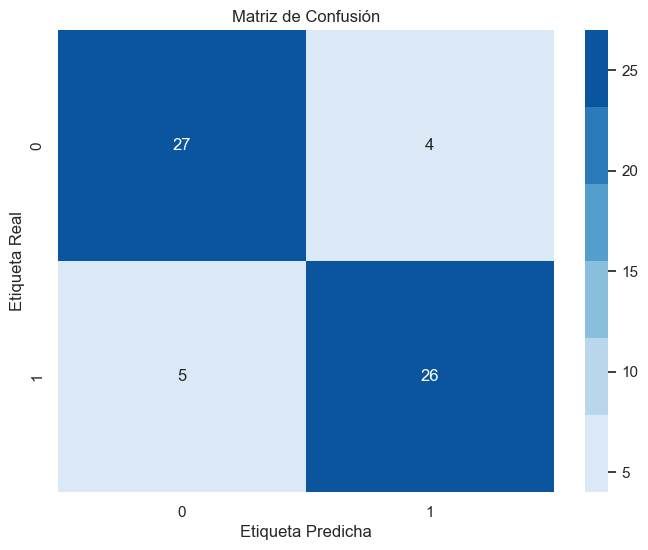

In [16]:
from sklearn.metrics import confusion_matrix

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Configurar la paleta de colores
cmap = sns.color_palette("Blues")  # Cambiar el nombre de la paleta de colores según tu preferencia

# Mostrar matriz de confusión con la paleta de colores personalizada
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico según tus preferencias
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)

# Configurar título, etiquetas de ejes y mostrar el gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()


Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [17]:
#Exactitud
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.8548387096774194


In [18]:
#Precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average= None)
print(precision)

[0.84375    0.86666667]


In [19]:
#Exhaustividad/Recall/Sensibilidad
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[0.87096774 0.83870968]


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

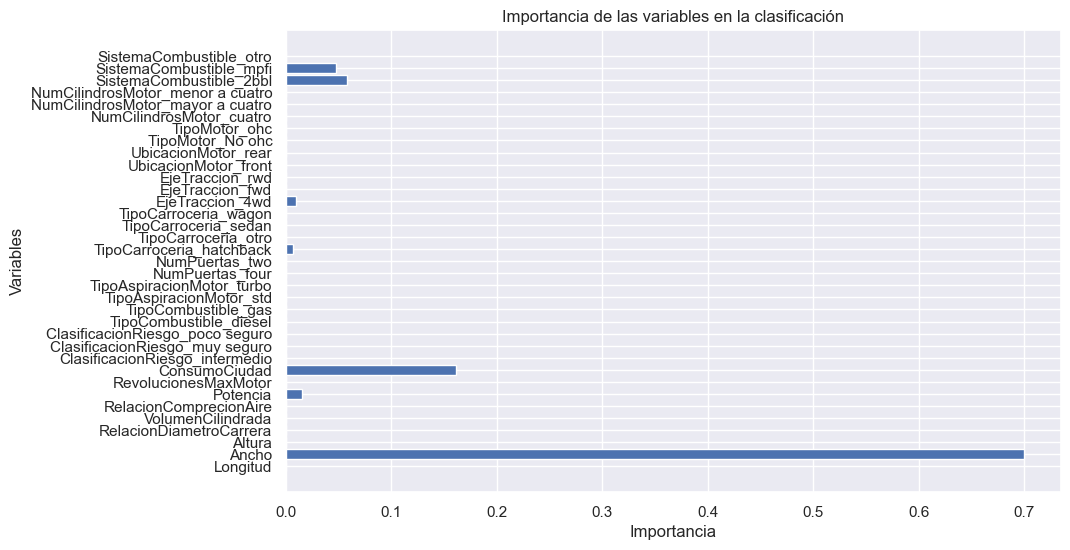

In [20]:
import matplotlib.pyplot as plt

# Obtener la importancia de las variables desde el modelo
importancia_variables = tree.feature_importances_

# Obtener los nombres de las variables
nombres_variables = X.columns.tolist()

# Crear un gráfico de barras para visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(nombres_variables, importancia_variables)
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en la clasificación')
plt.show()


Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [21]:
# Obtener la profundidad del árbol entrenado
profundidad = tree.tree_.max_depth

print("La profundidad del árbol es:", profundidad)

La profundidad del árbol es: 3


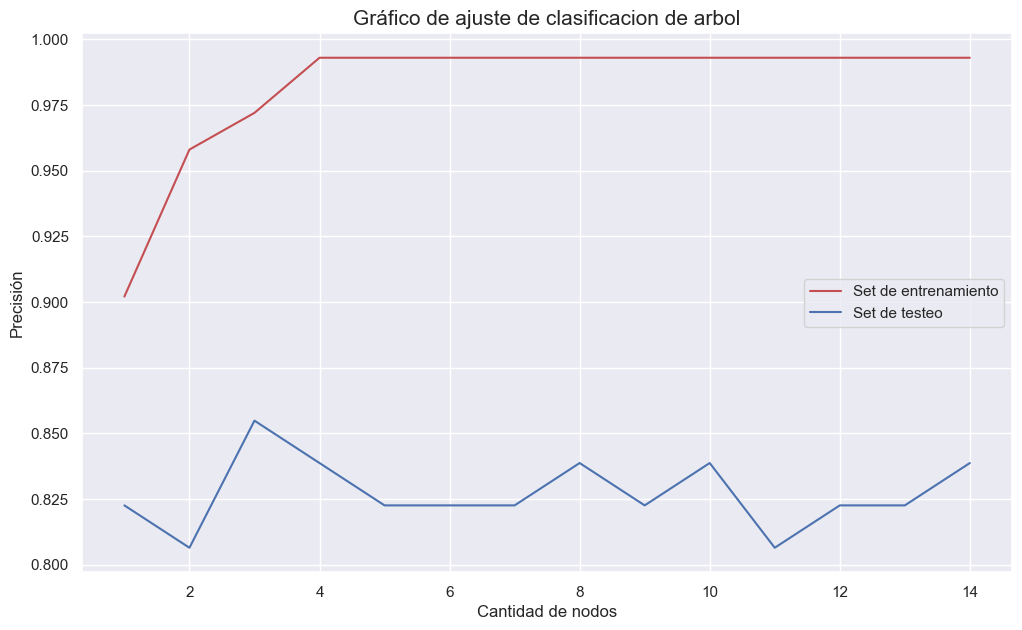

In [22]:
#Grafico de clasificacion por arbol
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 15))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth = deep)
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de clasificacion de arbol', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Cantidad de nodos')
plt.show()

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos el modelo clasificador
    
classifier = KNeighborsClassifier(n_neighbors=1)

In [25]:
# Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = classifier.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = classifier.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.986013986013986
Accuracy sobre conjunto de Test: 0.9354838709677419


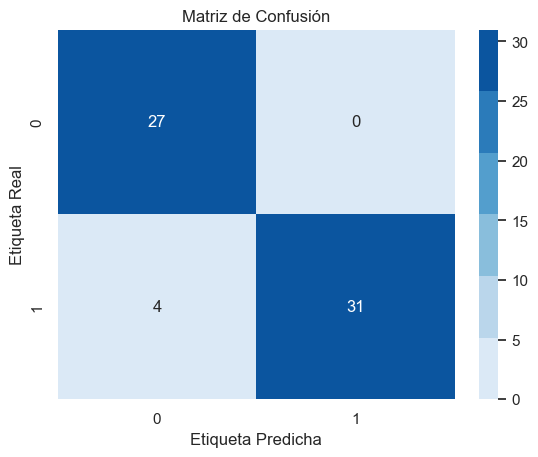

In [27]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Configurar la paleta de colores
cmap = sns.color_palette("Blues")  # Cambiar el nombre de la paleta de colores según tu preferencia

# Mostrar matriz de confusión con la paleta de colores personalizada
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)

# Configurar título, etiquetas de ejes y mostrar el gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

Encuentre el valor óptimo para k

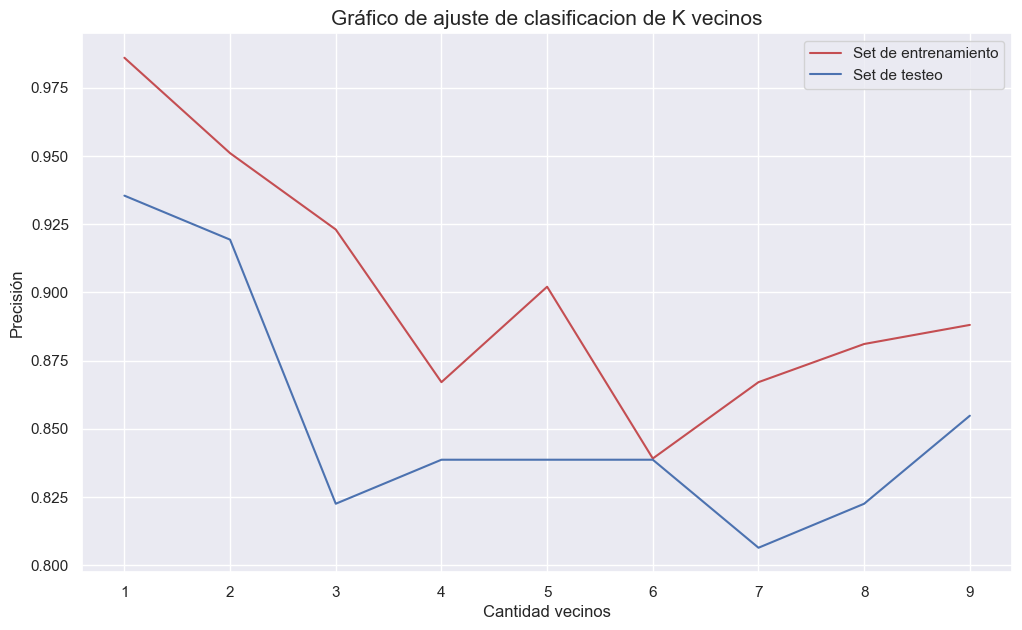

In [28]:
#Grafico de clasificacion por K vecinos
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 10))

for deep in max_deep_list:
    clf_3 = KNeighborsClassifier(n_neighbors=deep)
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de clasificacion de K vecinos', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Cantidad vecinos')
plt.show()

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [29]:
#Exactitud
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.9354838709677419


In [30]:
#Precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average= None)
print(precision)

[0.87096774 1.        ]


In [31]:
#Exhaustividad/Recall/Sensibilidad
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[1.         0.88571429]
